8. 
```
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season
```

In [1]:

import requests
import pandas as pd

def extract_data_from_URL(url:str)->None:
    try:

        response = requests.get(url)
        json_response = response.json()
        required_json = json_response['_embedded']['episodes']
        df = pd.DataFrame(pd.json_normalize(required_json))
        
        return df
    
    except Exception as e:
        print(f'error raised {e}')

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
df5 = extract_data_from_URL(url)


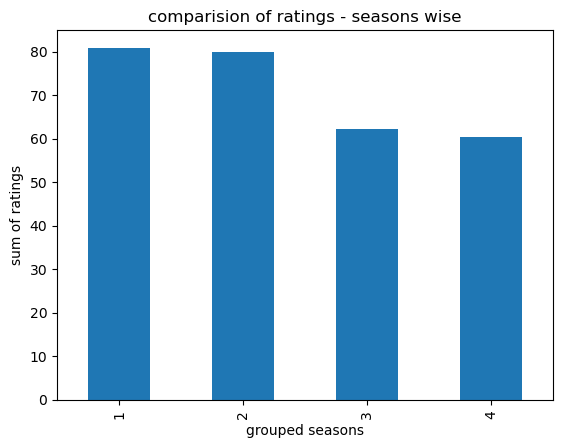

In [2]:
# 8.1

# Get all the overall ratings for each season and using plots compare the ratings for all the
# seasons, like season 1 ratings, season 2, and so on.
import matplotlib.pyplot as plt



grouped_ratings = df5.groupby(by='season')['rating.average'].sum()

grouped_ratings.plot(kind='bar')
plt.title('comparision of ratings - seasons wise')
plt.ylabel('sum of ratings')
plt.xlabel('grouped seasons')
plt.show()


In [3]:
#8.2

# Get all the episode names, whose average rating is more than 8 for every season

df5['rating'] = pd.to_numeric(df5['rating.average'].astype(str), errors='coerce')

grouped = df5.groupby('season')['rating'].mean()

episodes_with_high_ratings = df5[df5['season'].isin(grouped[grouped > 8].index)]['name']

for episodes in episodes_with_high_ratings:
    print(episodes)


The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind


In [10]:
#8.3
# Get all the episode names that aired before May 2019
df5[df5['airdate'] < '2019-01-01']

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href,rating
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,<p>A woman named Dolores is a free spirit in t...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371,8.0
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,<p>Bernard suspects that someone is sabotaging...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371,7.7
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,<p>Bernard continues to investigate Dolores' s...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371,7.6
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,<p>While Dolores joins William and Logan on th...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371,7.9
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,<p>Dolores takes the first step on her path of...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371,8.0
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,"<p>While Maeve convinces Felix to show her ""up...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/932057,https://api.tvmaze.com/shows/1371,8.0
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,<p>While William and Dolores travel to the unc...,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/938404,https://api.tvmaze.com/shows/1371,8.6
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,<p>Bernard tries to cope with what he did unde...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943065,https://api.tvmaze.com/shows/1371,7.9
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,<p>Bernard forces Robert to take him back into...,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943066,https://api.tvmaze.com/shows/1371,8.5
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,<p>Delores finds out the truth about William's...,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943067,https://api.tvmaze.com/shows/1371,8.7


In [11]:
#8.4
# Get the episode name from each season with the highest and lowest rating

max_rating = df5.groupby('season')['rating.average'].idxmax().apply(lambda x: df5.loc[x, 'name'])
min_rating = df5.groupby('season')['rating.average'].idxmin().apply(lambda x: df5.loc[x, 'name'])

for season in df5['season'].unique():
    max_rating_episode = max_rating[season]
    min_rating_episode = min_rating[season]
    print(f"Season {season}:")
    print(f"Highest Rating: {max_rating_episode}")
    print(f"Lowest Rating: {min_rating_episode}")
    print("*"*60)


Season 1:
Highest Rating: The Bicameral Mind
Lowest Rating: The Stray
************************************************************
Season 2:
Highest Rating: Kiksuya
Lowest Rating: Akane No Mai
************************************************************
Season 3:
Highest Rating: Parce Domine
Lowest Rating: Decoherence
************************************************************
Season 4:
Highest Rating: Zhuangzi
Lowest Rating: The Auguries
************************************************************


In [12]:
#8.5
# Get the summary for the most popular ( ratings ) episode in every season

max_rating = df5.groupby('season')['rating.average'].idxmax()

for season, episode in max_rating.items():
    episode_name = df5.loc[episode, 'name']
    episode_rating = df5.loc[episode, 'rating.average']
    episode_summary = df5.loc[episode, 'summary']

    print(f"Season {season}:")
    print(f"Most Popular Episode: {episode_name}")
    print(f"Rating: {episode_rating}")
    print(f"Summary: {episode_summary}")
    print("*"*30)


Season 1:
Most Popular Episode: The Bicameral Mind
Rating: 8.7
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>
******************************
Season 2:
Most Popular Episode: Kiksuya
Rating: 8.7
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>
******************************
Season 3:
Most Popular Episode: Parce Domine
Rating: 8.0
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>
******************************
Season 4:
Most Popular Episode: Zhuangzi
Rating: 7.8
Summary: <p>God is bored.</p>
******************************
